In [1]:
!pip install pandas openpyxl

In [2]:
import pandas as pd  # Import pandas library

# Load the Excel file
file_path = r'C:\Users\1234p\OneDrive\Documents\data_date.xlsx'  # Update the path if necessary
data = pd.read_excel(file_path)  # Read the Excel file

# Display the first few rows of the DataFrame
print(data.head())

        Date    Country                          Status  AQI Value
0 2022-07-21    Albania                            Good         14
1 2022-07-21    Algeria                        Moderate         65
2 2022-07-21    Andorra                        Moderate         55
3 2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4 2022-07-21  Argentina                        Moderate         63


In [3]:
# Get basic information about the dataset
data.info()

# View statistics of numeric columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15569 entries, 0 to 15568
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15569 non-null  datetime64[ns]
 1   Country    15569 non-null  object        
 2   Status     15569 non-null  object        
 3   AQI Value  15569 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 486.7+ KB


,Date,AQI Value
count,15569,15569.000000
mean,2023-02-09 04:46:48.966535936,61.653799
min,2022-07-21 00:00:00,1.000000
25%,2022-08-12 00:00:00,29.000000
50%,2022-09-08 00:00:00,52.000000
75%,2023-06-15 00:00:00,81.000000
max,2024-10-10 00:00:00,963.000000
std,NaN,48.466367


In [4]:
# Check for missing values
print(data.isnull().sum())

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [5]:
# Display the column names of the DataFrame
print(data.columns)

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')


In [6]:
# Define the target (what you want to predict)
y = data['AQI Value']  # Target variable

# Define features - if you want to use 'Country' and 'Status' as features, you can use one-hot encoding
features = data[['Country', 'Status']]  # Use categorical columns as features

# One-hot encode categorical features
features = pd.get_dummies(features, drop_first=True)  # Convert categorical variables into dummy/indicator variables

# Now you can normalize the features if needed

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (12455, 146)
Testing features shape: (3114, 146)
Training target shape: (12455,)
Testing target shape: (3114,)


In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 152.5931018118871
Mean Absolute Error: 8.603548362429269
R-squared: 0.929489231237207


In [10]:
import joblib

joblib.dump(model, 'air_quality_model.pkl')


['air_quality_model.pkl']

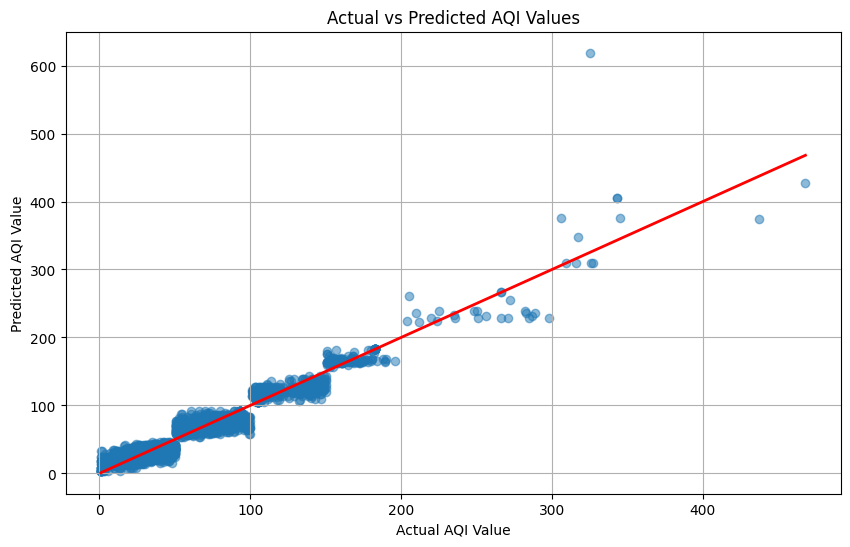

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # line of equality
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.title('Actual vs Predicted AQI Values')
plt.grid()
plt.show()